<h1 align="center">Home Loan Approval Prediction</h1>


# Preface

## Dataset Overview 📊

The dataset used comes from **Dream Housing Finance**, a company that offers home loans. The dataset is designed to predict customer loan eligibility based on several factors, such as gender, marital status, income, credit history, and loan-specific details. 

Here’s a summary of the columns in the dataset:
| **Key Name**          | **Description**                                                                |
|-----------------------|--------------------------------------------------------------------------------|
| Loan_ID               | Unique Loan ID                                                                 |
| Gender                | Applicant gender (Male / Female)                                               |
| Married               | Applicant married (Y / N)                                                      |
| Dependents            | Number of dependents (0 / 1 / 2 / 3+)                                          |
| Education             | Applicant Education (Graduate / Not Graduate)                                  |
| Self_Employed         | Self-employed (Y / N)                                                          |
| ApplicantIncome       | Applicant income                                                               |
| CoapplicantIncome     | Coapplicant income                                                             |
| LoanAmount            | Loan amount                                                                    |
| Loan_Amount_Term      | Term of a loan in months                                                       |
| Credit_History        | Customer past credit history (1: Good credit history / 0: Bad credit history)  |
| Property_Area         | Urban / Semiurban / Rural                                                      |
| Loan_Status           | Loan approved (Y / N)                                                          |

It contains a total of **12 features**, which are categorized into **8 categorical features and 4 numerical features**. The target variable for this analysis is **Loan_Status**, which indicates whether a loan was approved or not (Y/N).

## Objectives

### Background

Many individuals have raised concerns about the extended approval process for home loans, which typically ranges from 18 to 40 days but can often take even longer. This delay causes discomfort for those in urgent need of housing, leading to increased anxiety and uncertainty among prospective borrowers who seek a quicker resolution. To address these issues and improve customer satisfaction, **Dream Housing Finance Company**, which specializes in home loans, must efficiently manage the growing volume of applications. As part of this effort, the company aims to develop a predictive model to streamline the loan assessment process, reducing processing time and improving outcomes for applicants.

### Problem Statement

Developing a classification-based machine learning model to automate loan eligibility assessments aims to reduce approval time and minimize errors, thereby enhancing customer satisfaction.

### Machine Learning Model

**Objectives:**

1. **Conduct exploratory data analysis (EDA)** on the customer dataset to uncover important trends and insights.
2. **Perform feature engineering** to prepare and enhance the dataset's predictive power.
3. **Build machine learning models** based on the preprocessed data and insights from EDA.
4. **Evaluate model performance** using key evaluation metrics, with the **F1-score** as the primary metric to reduce financial losses from incorrect approvals and avoid missed revenue from eligible borrowers.
5. **Select and optimize the best-performing model** using hyperparameter tuning to predict loan approval decisions.


**Machine learning models employed in this project:**

- **K-Nearest Neighbour (KNN):** This model is effective for home loan prediction as it can capture the similarity between applicants based on their features, helping to identify potential approvals based on historical data.
  
- **Support Vector Machine (SVM):** SVM is particularly useful for this task due to its ability to create clear decision boundaries between approved and rejected loan applicants, thus enhancing accuracy in predictions.
  
- **Decision Tree:** This model provides a transparent decision-making process that allows stakeholders to understand the criteria used for loan approvals, making it ideal for compliance and interpretability in home loan applications.

- **Random Forest:** Utilizing multiple decision trees, Random Forest improves prediction accuracy and reduces the risk of overfitting, which is critical in assessing diverse loan applicant profiles in the home loan sector.

- **XGBoost:** Known for its performance in classification tasks, XGBoost optimizes the prediction of loan approvals by efficiently handling complex datasets and capturing non-linear relationships between features.

## URLs

URL Dataset: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

URL Model Deployment: https://huggingface.co/spaces/karenlontoh/home-loan-prediction

# Import Libraries

Importing libraries that will be used in this notebook.

In [1]:
!pip install feature_engine==1.6.2

In [2]:
# Data
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# EDA
from scipy.stats import chi2_contingency, f_oneway

# Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# Model Saving
import pickle

Import libraries has been successfully performed.

# Data Loading

## Load Data

In [3]:
# Load data
df = pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data has been successfully loaded.

## Summary Information

In [4]:
# Summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Checking the first 10 unique values in each column
unique_values = df.apply(lambda x: x.unique()[:10])

# Displaying the first 10 unique values in each column
for column, values in unique_values.items():
    print(f"'{column}': {values.tolist()}")

'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008', 'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020']
'Gender': ['Male', 'Female', nan]
'Married': ['No', 'Yes', nan]
'Dependents': ['0', '1', '2', '3+', nan]
'Education': ['Graduate', 'Not Graduate']
'Self_Employed': ['No', 'Yes', nan]
'ApplicantIncome': [5849, 4583, 3000, 2583, 6000, 5417, 2333, 3036, 4006, 12841]
'CoapplicantIncome': [0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, 1526.0, 10968.0, 700.0, 1840.0]
'LoanAmount': [nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, 158.0, 168.0, 349.0]
'Loan_Amount_Term': [360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0, 480.0, 36.0, 84.0]
'Credit_History': [1.0, 0.0, nan]
'Property_Area': ['Urban', 'Rural', 'Semiurban']
'Loan_Status': ['Y', 'N']


Here are some concise insights based on the summary information of the dataset:

1. **Data Size**: The dataset contains 614 entries with 13 columns.

2. **Missing Values**: Several columns exhibit missing values, indicating potential data quality issues that require attention. Addressing these missing values is crucial for ensuring the accuracy and reliability of analyses moving forward.

3. **Categorical Data**: The dataset includes 8 categorical columns, such as **Loan_ID**, **Gender**, **Married**, **Dependents**, **Education**, **Self_Employed**, **Credit_History**, and **Property_Area**, which can provide valuable insights into loan approval trends.

4. **Numerical Data**: The presence of numerical 4 columns like **ApplicantIncome**, **CoapplicantIncome**, **LoanAmount**, and **Loan_Amount_Term** allows for quantitative analysis, such as correlations with loan status.

5. **Target Variable**: The **Loan_Status** column is fully populated, providing a clear target for predictive classification modeling.

## Check Missing Values

In [6]:
# Check missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Based on the missing value analysis, the following columns contain missing values:

- **Gender**: 13 missing
- **Married**: 3 missing
- **Dependents**: 15 missing
- **Self_Employed**: 32 missing
- **LoanAmount**: 22 missing
- **Loan_Amount_Term**: 14 missing
- **Credit_History**: 50 missing

Next, an analysis will be conducted on each column with missing values to determine whether they fall under MCAR, MNAR, or MAR, in order to understand the appropriate handling method.

### Gender

In [7]:
# Create a new DataFrame with rows containing missing values in the 'Gender' column
missing_values_gender = df[df['Gender'].isnull()]

# Display the DataFrame with missing values
missing_values_gender

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


The missing "Gender" values are likely **MCAR (Missing Completely At Random)** because there is no clear pattern from other columns that directly indicates why the "Gender" column has null values.

### Married

In [8]:
# Create a new DataFrame with rows containing missing values in the 'Married' column
missing_values_married = df[df['Married'].isnull()]

# Display the DataFrame with missing values
missing_values_married

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


The missing values in the "Married" column may initially seem to follow a pattern, as they occur alongside missing values in the "Dependents" column, with the conditions of "Education" being Graduate, "Self_Employed" as No, and "Credit_History" as 1. However, under the same conditions, there are instances where the "Married" column is not null. This indicates that these columns are not related to the missing values in "Married," suggesting that the missing data in "Married" is **MCAR (Missing Completely At Random)**.

### Dependents

In [9]:
# Create a new DataFrame with rows containing missing values in the 'Dependents' column
missing_values_dependents = df[df['Dependents'].isnull()]

# Display the DataFrame with missing values
missing_values_dependents

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


The missing "Dependents" values are likely **MCAR (Missing Completely At Random)** because there is no clear pattern from other columns that directly indicates why the "Dependents" column has null values.

### Self Employed

In [10]:
# Create a new DataFrame with rows containing missing values in the 'Self_Employed' column
missing_values_self_employed = df[df['Self_Employed'].isnull()]

# Display the DataFrame with missing values
missing_values_self_employed

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


The missing "Self_Employed" values are likely **MCAR (Missing Completely At Random)** because there is no clear pattern from other columns that directly indicates why the "Self_Employed" column has null values.

### Loan Amount

In [11]:
# Create a new DataFrame with rows containing missing values in the 'LoanAmount' column
missing_values_loanamount = df[df['LoanAmount'].isnull()]

# Display the DataFrame with missing values
missing_values_loanamount

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


The missing "LoanAmount" values are likely **MCAR (Missing Completely At Random)** because there is no clear pattern from other columns that directly indicates why the "LoanAmount" column has null values.

### Loan Amount Term

In [12]:
# Create a new DataFrame with rows containing missing values in the 'Loan_Amount_Term' column
missing_values_loan_amount_term = df[df['Loan_Amount_Term'].isnull()]

# Display the DataFrame with missing values
missing_values_loan_amount_term

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


The missing "Loan_Amount_Term" values are likely **MCAR (Missing Completely At Random)** because there is no clear pattern from other columns that directly indicates why the "Loan_Amount_Term" column has null values.

### Credit History

In [13]:
# Create a new DataFrame with rows containing missing values in the 'Credit_History' column
missing_values_credit_history = df[df['Credit_History'].isnull()]

# Display the DataFrame with missing values
missing_values_credit_history

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


The missing "CreditHistory" values are likely **MCAR (Missing Completely At Random)** because there is no clear pattern from other columns that directly indicates why the "CreditHistory" column has null values.

It has been determined that all columns have missing values categorized as **MCAR (Missing Completely At Random)**. Next steps will involve a deeper examination of these missing values, which will be addressed through appropriate handling methods during feature engineering.

## Check Duplicate Values

In [14]:
df.duplicated().sum()

0

There are no duplicate values found in the dataset.

# Exploratory Data Analysis (EDA)

## Categorical Columns Distribution

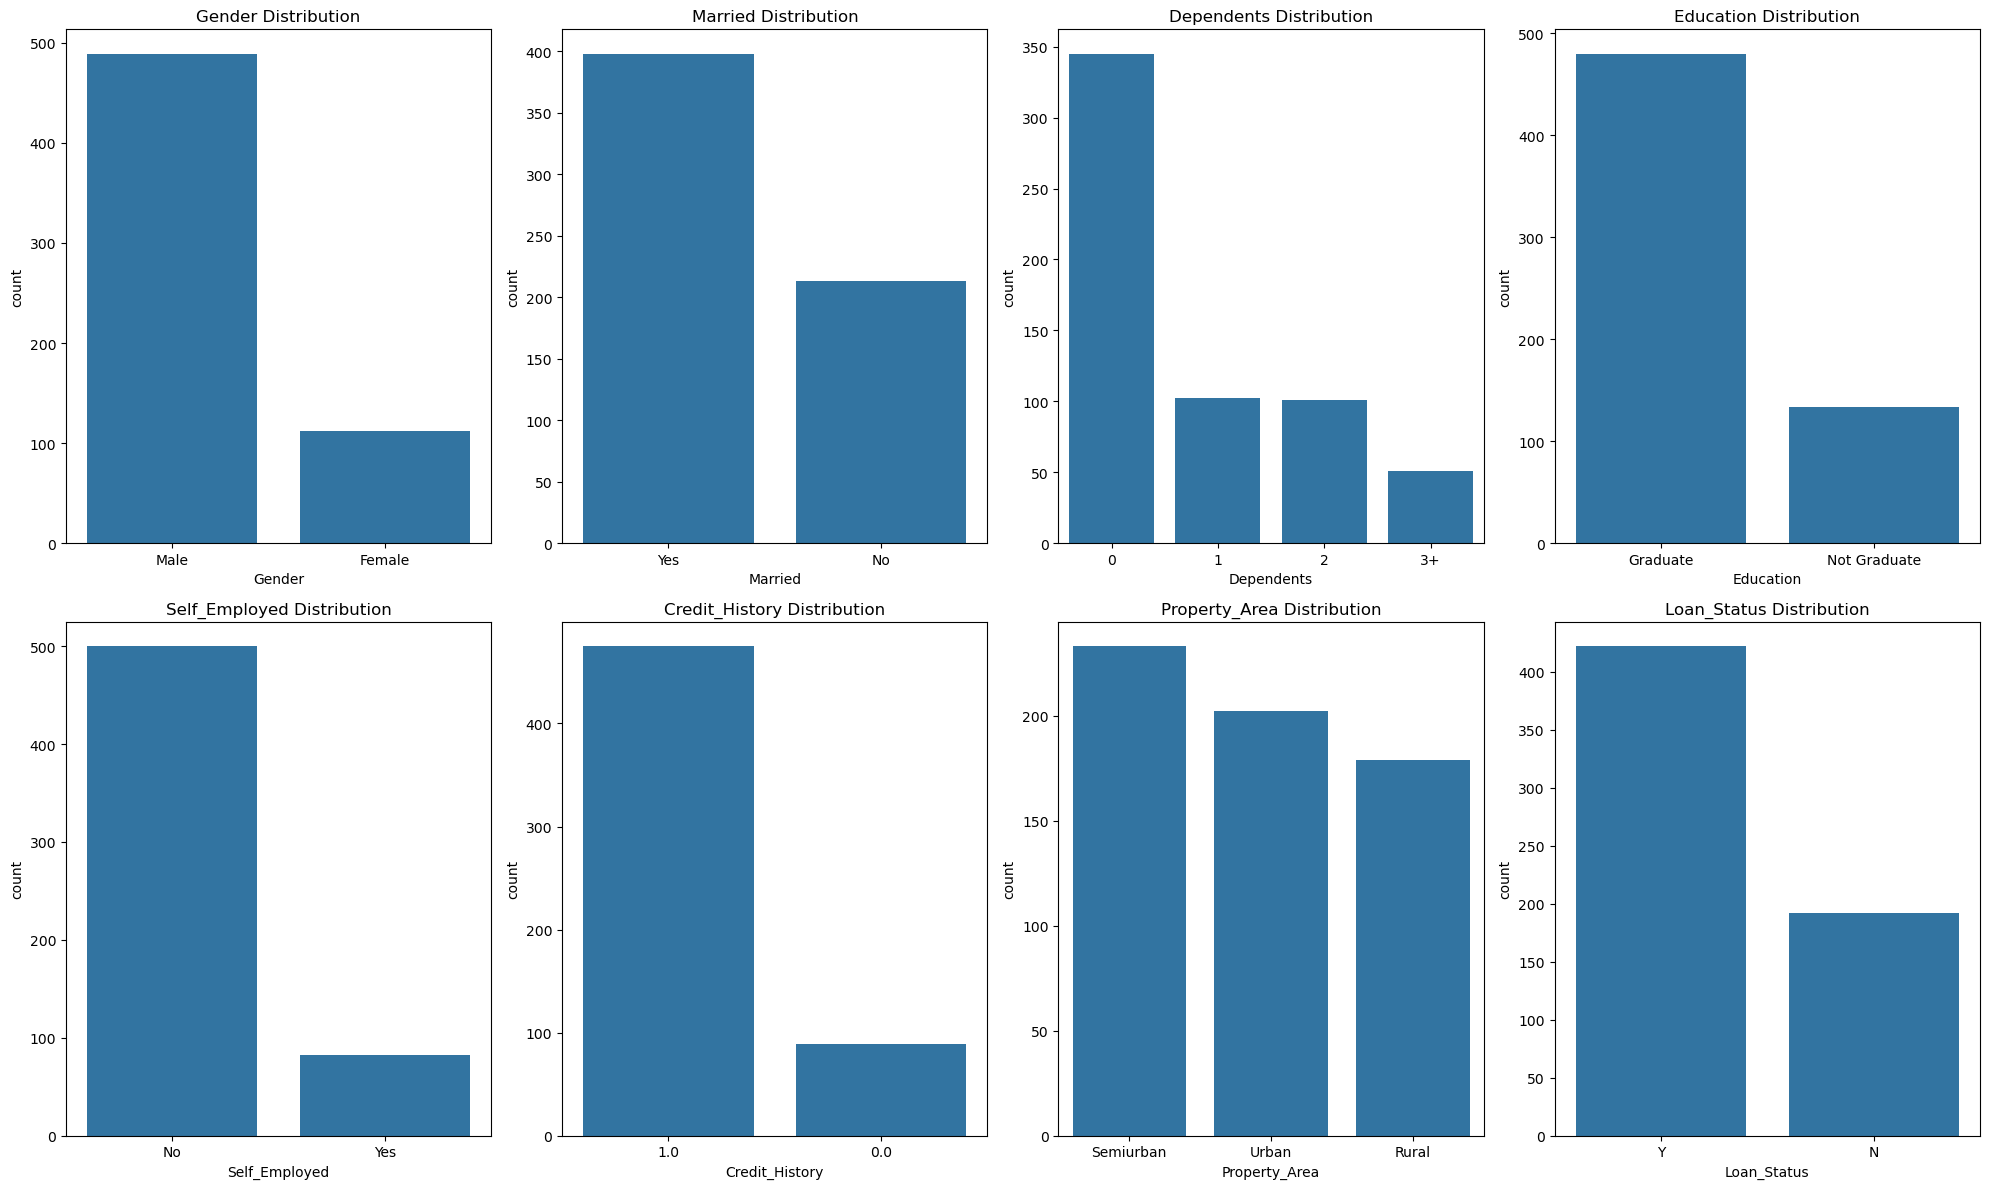

In [15]:
# Specify the columns
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Create subplots
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

for i, column in enumerate(cols):
    order = (
        df[column]
        .value_counts(normalize=True)
        .sort_values(ascending=False)
        .index 
    )
    sns.countplot(data=df, x=column, ax=ax[i//4, i%4], order=order)
    ax[i//4, i%4].set_title(f'{column} Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

**Key Findings and Insights Based on Distribution:**

**1. Gender**: 
   - **Key Findings**: Male applicants outnumber female applicants.
   - **Insight**: This may be due to cultural or financial factors, where men are more often the primary earners in households, or they may take the lead in financial matters.

**2. Marital Status**: 
   - **Key Findings**: More married applicants apply for home loans compared to single applicants.
   - **Insight**: Married individuals often enjoy greater financial security due to dual incomes, which enables them to handle larger commitments like home loans. They also tend to seek homes that meet their family’s needs, prioritizing stability and space for growth.

**3. Dependents**: 
   - **Key Findings**: Applicants without dependents are the largest group, followed by those with 1, 2, and 3+ dependents.
   - **Insight**: Applicants without dependents may feel more financially secure, with fewer obligations, making them more comfortable applying for a home loan. Those with fewer dependents may have more disposable income for housing investments.

**4. Education**: 
   - **Key Findings**: Graduates make up the majority of applicants.
   - **Insight**: People who have graduated often earn more due to better job opportunities. With higher income and job security, they are more comfortable applying for loans and investing in property.

**5. Self-employed**: 
   - **Key Findings**: Non-self-employed applicants are more prevalent.
   - **Insight**: Salaried employees might feel more confident applying for a loan because they have a stable and predictable income, unlike self-employed individuals, whose income might fluctuate, leading to hesitation in applying for long-term financial commitments.

**6. Credit History**: 
   - **Key Findings**: Most applicants have a good credit history.
   - **Insight**: Applicants with good credit histories tend to feel more confident in applying for loans due to their past experience with managing debt, which may increase their likelihood of approval.

**7. Property Area**: 
   - **Key Findings**: Most applicants prefer properties in semi-urban areas, followed by urban and rural areas.
   - **Insight**: Semi-urban areas could offer an ideal mix of affordability and access to amenities, making them appealing for buyers. Urban properties are often more expensive, and rural areas might lack essential services, so semi-urban regions are likely to be more attractive.

**8. Loan Status**: 
   - **Key Findings**: More loans are approved than rejected.
   - **Insight**: This suggests that many applicants meet the basic loan eligibility criteria. However, the high approval rate may also imply that **the dataset is imbalanced**, which should be addressed in model training to prevent biased predictions.

## Numerical Features vs Target

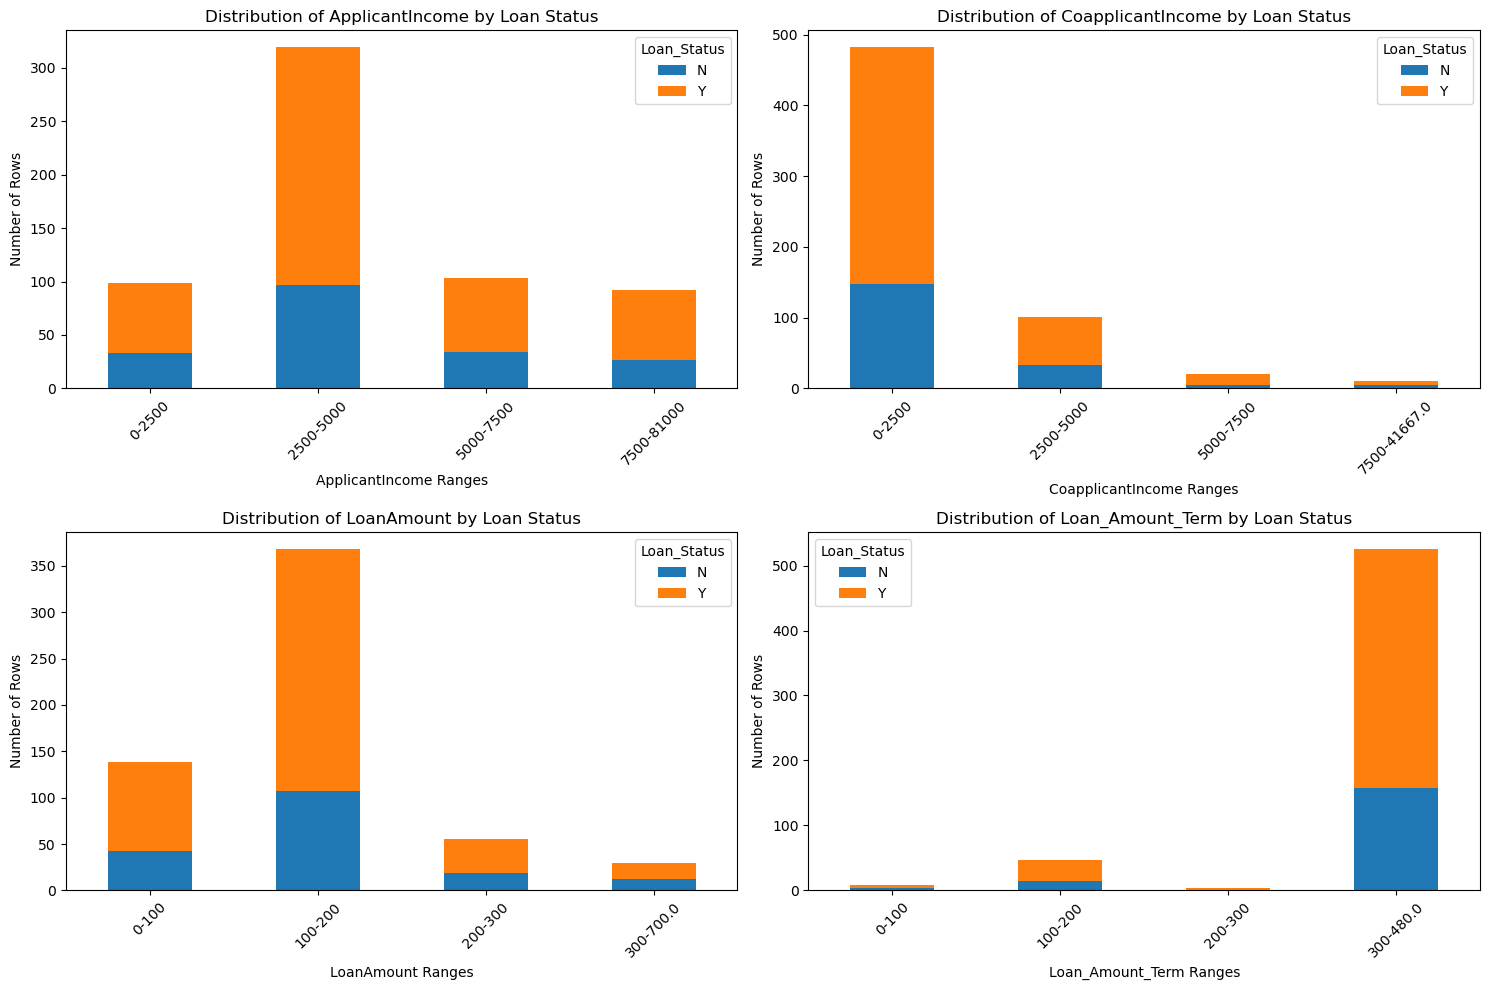

In [16]:
# Copy DataFrame
df_new = df.copy()

# Specify the columns 
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, selected_col in enumerate(num_cols):
    # Define custom bins for 4 ranges based on the selected column
    if selected_col in ['ApplicantIncome', 'CoapplicantIncome']:
        bins = [0, 2500, 5000, 7500, df_new[selected_col].max()]
        labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
    else:  # For LoanAmount and Loan_Amount_Term
        bins = [0, 100, 200, 300, df_new[selected_col].max()]
        labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

    # Create a new column for the binned data
    df_new[f'{selected_col}_bins'] = pd.cut(df_new[selected_col], bins=bins, labels=labels, right=False)

    # Count the number of rows in each bin grouped by Loan_Status with observed=True
    count_df_new = df_new.groupby([f'{selected_col}_bins', 'Loan_Status'], observed=True).size().unstack(fill_value=0)

    # Create a stacked bar chart for each subplot
    count_df_new.plot(kind='bar', stacked=True, ax=ax[i//2, i%2], color=['#1f77b4', '#ff7f0e']) 
    ax[i//2, i%2].set_title(f'Distribution of {selected_col} by Loan Status')
    ax[i//2, i%2].set_xlabel(f'{selected_col} Ranges')
    ax[i//2, i%2].set_ylabel('Number of Rows')
    ax[i//2, i%2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Here are the insights from the visualizations of loan status (approved vs. not approved) across various categorical columns:

1. **Applicant Income:** The highest approval rate is in the 2500-5000 income range. This suggests that individuals within this range may be actively seeking loans to make essential purchases, such as housing. The significant approval rate indicates that lenders view this income bracket as relatively stable yet still in need of financial assistance.

2. **Coapplicant Income:** The 0-2500 range for coapplicant income has the highest number of approvals, indicating that many borrowers utilize coapplicants to improve their chances of securing loans. This suggests that lenders are willing to approve applications where coapplicants help meet loan eligibility criteria, despite the lower individual income levels.

3. **Loan Amount:** The most approvals occur in the 100-200 loan amount range, suggesting that this is a common threshold for initial home purchases or necessary upgrades. Borrowers in this range may have clear financial needs, making them appealing to lenders.

4. **Loan Amount Term:** The highest approval rate is seen for loan terms in the 300-480 range. This flexibility likely allows borrowers to manage their monthly payments more effectively, making loans more accessible, especially for those with varying income streams or additional financial commitments.

## Categorical Features vs Target

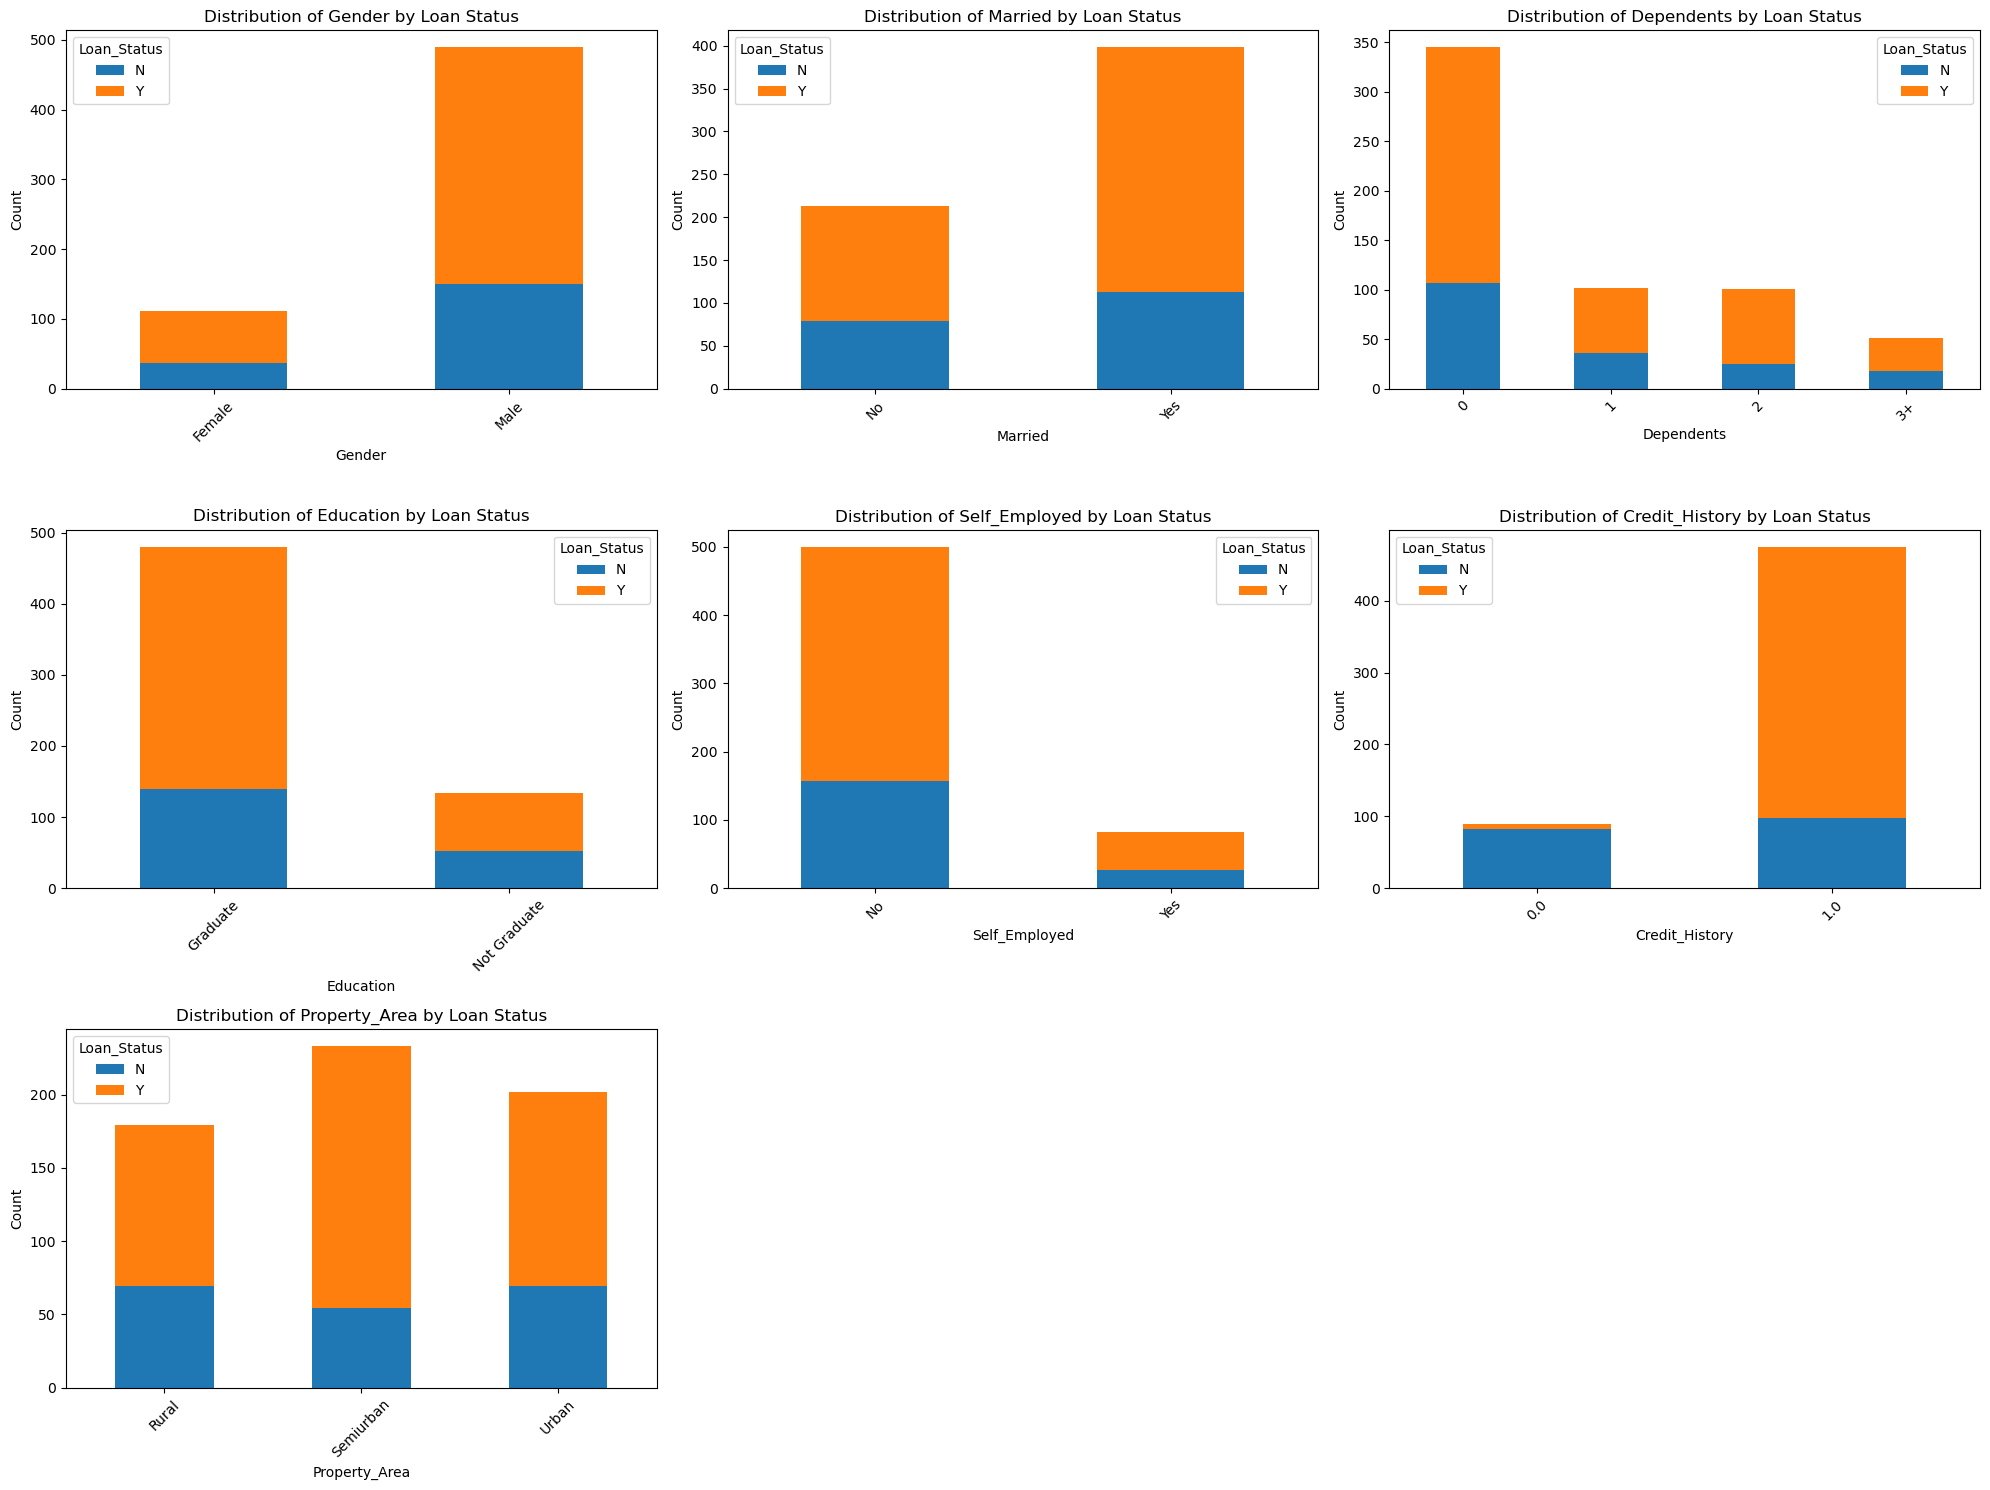

In [17]:
# Specify the columns for categorical features
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Create subplots (3 rows and 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the specified columns to create stacked bar charts
for i, feature in enumerate(cols):
    # Count the number of occurrences for each feature and Loan_Status
    count_data = df.groupby([feature, 'Loan_Status']).size().unstack(fill_value=0)

    # Create a stacked bar chart
    count_data.plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4', '#ff7f0e']) 
    axes[i].set_title(f'Distribution of {feature} by Loan Status')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) 

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Here are the insights from the visualizations of loan status (approved vs. not approved) across various categorical columns:

1. **Gender:** The higher approval rate for male applicants suggests a potential bias in lending practices or differing financial profiles between genders. This indicates that males might be perceived as less risky.

2. **Married:** Married individuals tend to have a higher approval rate, likely due to perceived financial stability and shared financial responsibilities.

3. **Dependents:** Applicants without dependents are more likely to be approved, indicating that fewer financial obligations make them more attractive to lenders.

4. **Education:** Graduates are more frequently approved for loans, indicating that educational attainment may correlate with financial reliability and earning potential.

5. **Self-Employment:** The lower approval rates for self-employed individuals suggest concerns about income stability and the risk associated with variable earnings.

6. **Credit History:** Strong credit history correlates with higher approval rates, reflecting lenders' reliance on credit scores to assess risk.

7. **Property Area:** Semiurban areas show higher loan approval rates due to their economic growth and stability, making them less risky for lenders compared to urban and rural regions.

# Feature Engineering

## Cardinality

In [18]:
# Set the maximum column width to None to improve visibility of unique values
pd.set_option('display.max_colwidth', None)

# Identify categorical columns with 'object' data type
col_cat = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Initialize an empty list to store cardinality information
listItem = []

# Loop through each categorical column to count its cardinality
for col in col_cat:
    listItem.append([col, df[col].nunique(), df[col].unique()[:10]])

# Create a DataFrame to display cardinality information of categorical columns
pd.DataFrame(columns=['Column Name', 'Num of Unique Values', 'Unique Values'], data=listItem)

,Column Name,Num of Unique Values,Unique Values
0,Loan_ID,614,"[LP001002, LP001003, LP001005, LP001006, LP001008, LP001011, LP001013, LP001014, LP001018, LP001020]"
1,Gender,2,"[Male, Female, nan]"
2,Married,2,"[No, Yes, nan]"
3,Dependents,4,"[0, 1, 2, 3+, nan]"
4,Education,2,"[Graduate, Not Graduate]"
5,Self_Employed,2,"[No, Yes, nan]"
6,Credit_History,2,"[1.0, 0.0, nan]"
7,Property_Area,3,"[Urban, Rural, Semiurban]"


In this dataset, there are **614 unique values** for the **Loan_ID** column, but handling cardinality is not necessary because this column serves as a unique identifier that does not contribute to the predictive strength of the model. Additionally, the other columns are safe in terms of unique values, with ranges typically around **2-4 unique values**. This indicates that these columns exhibit relatively **low variability** and are unlikely to pose issues in data analysis or modeling.

## Splitting Features and Target

In [19]:
# Splitting between X (features) and y (target)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [20]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


Splitting features and target was successful.

## Splitting Train Set and Test Set

In [21]:
# Splitting train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (491, 12)
Test Size (123, 12)


Splitting train and test set was successful.

## Handling Outlier

### Check Outlier

An outlier check was conducted by first examining the distribution of each column to determine whether it is normal or skewed.

In [22]:
# Specify the numerical columns to check for skewness
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize an empty list to store results
listItem = []

# Loop through the numerical columns
for col in cols:
    # Check if the column exists in the DataFrame and is numeric
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        # Calculate skewness and round it
        skew_value = round(df[col].skew(), 1)
        # Determine the type of distribution based on skewness value
        distribution_type = 'Normal' if -0.5 <= skew_value <= 0.5 else 'Skewed'
        # Append the results to the listItem
        listItem.append([col, skew_value, distribution_type])
    else:
        print(f"Column '{col}' does not exist or is not numeric.")

# Create a DataFrame for skewness results
skewness = pd.DataFrame(columns=['Column Name', 'Skewness Value', 'Distribution Type'], data=listItem)

# Display the skewness DataFrame
skewness

,Column Name,Skewness Value,Distribution Type
0,ApplicantIncome,6.5,Skewed
1,CoapplicantIncome,7.5,Skewed
2,LoanAmount,2.7,Skewed
3,Loan_Amount_Term,-2.4,Skewed


It is known that all columns have a skewed distribution.

In [23]:
def check_outlier(data):
    # Initialize lists to store results
    column = []
    lower_bound = []
    upper_bound = []
    percent_total_outlier = []
    min_values = []
    max_values = []
    median_values = []
    range_values = []

    for row in range(len(skewness)):
        col = skewness['Column Name'][row]
        
        # Check upper and lower bounds
        if skewness['Distribution Type'][row] == 'Skewed':
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)
        else:
            lower_boundary = data[col].mean() - 3 * data[col].std()
            upper_boundary = data[col].mean() + 3 * data[col].std()
        
        # Append to lists
        column.append(col)
        lower_bound.append(lower_boundary)
        upper_bound.append(upper_boundary)
        
        # Calculate total outlier percentage
        totout = ((len(data[data[col] > upper_boundary]) / len(data) * 100) + 
                   (len(data[data[col] < lower_boundary]) / len(data) * 100))
        percent_total_outlier.append(totout)
        
        # Get min, max, and median values for each column
        min_values.append(round(data[col].min(), 2))  
        max_values.append(round(data[col].max(), 2)) 
        median_values.append(round(data[col].median(), 2))  
        range_values.append(round(data[col].max() - data[col].min(), 2))

    # Create DataFrame for outliers
    outliers = pd.DataFrame({
        'column': column,
        'upper_boundary': [round(upper, 2) for upper in upper_bound],
        'lower_boundary': [round(lower, 2) for lower in lower_bound],
        'percentage_total_outlier': [round(percent, 2) for percent in percent_total_outlier],
        'min': min_values, 
        'max': max_values,
        'median': median_values, 
        'range': range_values   
    })

    return outliers

# Call the function on numerical data
check_outlier(X_train)

,column,upper_boundary,lower_boundary,percentage_total_outlier,min,max,median,range
0,ApplicantIncome,14174.5,-5565.50,5.30,210.0,63337.0,3813.0,63127.0
1,CoapplicantIncome,8964.0,-6723.00,1.02,0.0,33837.0,1126.0,33837.0
2,LoanAmount,343.0,-82.25,2.44,9.0,700.0,125.0,691.0
3,Loan_Amount_Term,360.0,360.00,14.05,12.0,480.0,360.0,468.0


**Outlier Analysis Summary**

- **ApplicantIncome**: 
  - **Action**: Capping  
  - **Reason**: The maximum value (63,337.0) significantly exceeds the upper boundary (14,174.5), indicating extreme outliers. Capping will help reduce skewness and improve analysis.

- **CoapplicantIncome**: 
  - **Action**: Capping  
  - **Reason**: The maximum value (33,837.0) exceeds the upper boundary (8,964.0), suggesting potential outliers. Capping is necessary to maintain dataset integrity.

- **LoanAmount**: 
  - **Action**: Capping  
  - **Reason**: The maximum value (700.0) exceeds the upper boundary (343.0), indicating potential outliers. Capping will help maintain dataset integrity.

- **Loan_Amount_Term**: 
  - **Action**: No action needed  
  - **Reason**: Although there are outliers with a maximum of 480 months, this value is still considered reasonable within the context of loan terms, as it remains within an acceptable range for borrowers who may prefer extended repayment periods.
  
This summary now clearly indicates that capping will be applied to **ApplicantIncome**, **CoapplicantIncome**, and **LoanAmount**, while no action is needed for **Loan_Amount_Term**.

### Capping

Capping will be performed using the IQR (Interquartile Range) method since these three columns exhibit skewed distributions.

In [24]:
# Initializing Winsorizer for selected variables
winsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=3,
                         variables=['ApplicantIncome','CoapplicantIncome','LoanAmount'],
                         missing_values='ignore')

# Transforming the training and testing datasets
X_train_capped = winsoriser.fit_transform(X_train)
X_test_capped = winsoriser.transform(X_test)

In [25]:
# Call the function on numerical data
check_outlier(X_train_capped)

,column,upper_boundary,lower_boundary,percentage_total_outlier,min,max,median,range
0,ApplicantIncome,14174.5,-5565.50,0.00,210.0,14174.5,3813.0,13964.5
1,CoapplicantIncome,8964.0,-6723.00,0.00,0.0,8964.0,1126.0,8964.0
2,LoanAmount,343.0,-82.25,0.00,9.0,343.0,125.0,334.0
3,Loan_Amount_Term,360.0,360.00,14.05,12.0,480.0,360.0,468.0


Capping has been successfully performed.

## Handling Missing Values

Based on the previous findings, it was indicated that all columns with missing values are MCAR, so imputation will be conducted to avoid losing information. The mode will be used for categorical variables and the median for numerical variables. The mode is chosen because it represents the most frequently occurring category, thus preserving the most common value in the dataset. The median is selected because it provides a measure of central tendency that is less affected by outliers, ensuring a more robust estimate of the central value for numerical data.

In [26]:
# Check missing values
X_train_capped.isnull().sum()

Loan_ID               0
Gender               10
Married               2
Dependents           11
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     11
Credit_History       34
Property_Area         0
dtype: int64

There are missing values in the following columns, which will be handled separately for categorical and numerical features:

- **Categorical Features**: Gender, Married, Dependents, Self_Employed, and Credit_History.

- **Numerical Features**: LoanAmount and Loan_Amount_Term.

### Categorical Features

In [27]:
# Fill missing values in X_train_capped using the mode from X_train_capped
X_train_capped['Gender'] = X_train_capped['Gender'].fillna(X_train_capped['Gender'].mode()[0])
X_train_capped['Married'] = X_train_capped['Married'].fillna(X_train_capped['Married'].mode()[0])
X_train_capped['Dependents'] = X_train_capped['Dependents'].fillna(X_train_capped['Dependents'].mode()[0])
X_train_capped['Self_Employed'] = X_train_capped['Self_Employed'].fillna(X_train_capped['Self_Employed'].mode()[0])
X_train_capped['Credit_History'] = X_train_capped['Credit_History'].fillna(X_train_capped['Credit_History'].mode()[0])

# Fill missing values in X_test_capped using the mode from X_train_capped
X_test_capped['Gender'] = X_test_capped['Gender'].fillna(X_train_capped['Gender'].mode()[0])
X_test_capped['Married'] = X_test_capped['Married'].fillna(X_train_capped['Married'].mode()[0])
X_test_capped['Dependents'] = X_test_capped['Dependents'].fillna(X_train_capped['Dependents'].mode()[0])
X_test_capped['Self_Employed'] = X_test_capped['Self_Employed'].fillna(X_train_capped['Self_Employed'].mode()[0])
X_test_capped['Credit_History'] = X_test_capped['Credit_History'].fillna(X_train_capped['Credit_History'].mode()[0])

### Numerical Features

In [28]:
# Fill missing values in X_train_capped using the median from X_train_capped
X_train_capped['LoanAmount'] = X_train_capped['LoanAmount'].fillna(X_train_capped['LoanAmount'].median())
X_train_capped['Loan_Amount_Term'] = X_train_capped['Loan_Amount_Term'].fillna(X_train_capped['Loan_Amount_Term'].median())

# Fill missing values in X_test_capped using the median from X_train_capped
X_test_capped['LoanAmount'] = X_test_capped['LoanAmount'].fillna(X_train_capped['LoanAmount'].median())
X_test_capped['Loan_Amount_Term'] = X_test_capped['Loan_Amount_Term'].fillna(X_train_capped['Loan_Amount_Term'].median())

In [29]:
# Check missing values
X_train_capped.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Imputation has been successfully performed.

## Data Balancing

Based on the findings from the distribution of loan_status, it is observed that the approved status is more prevalent. To address this class imbalance, data balancing will be performed using SMOTENC. This technique will help generate synthetic samples for the minority class while preserving the information in the nominal variables, thereby improving the model's ability to generalize and reducing the risk of bias towards the majority class.

In [30]:
# SMOTE-NC
smotenc = SMOTENC([0, 1, 2, 3, 4, 5, 10, 11], random_state = 10)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_capped, y_train)
y_train_balanced.value_counts()

Loan_Status
Y    337
N    337
Name: count, dtype: int64

Data balancing has been successfully performed.

## Split Numeric Columns and Categorical Columns

In [31]:
# Defining categorical and numerical columns
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
cat_columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

# Printing the lists of columns
print('Numeric Columns:', num_columns)
print('Categorical Columns:', cat_columns)

Numeric Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [32]:
# Split between Numerical Features and Categorical Features
X_train_balanced_num = X_train_balanced[num_columns]
X_train_balanced_cat = X_train_balanced[cat_columns]

Split numeric and categorical columns has been successfully performed.

## Feature Selection

Feature selection has been conducted to assess the importance of each feature on the target variable. The Chi-square test was utilized for categorical features, while ANOVA was applied for numerical features.

In [33]:
# Initialize results storage
results = []
p_values = []
interpretasi = []
cols = []

# Loop through each categorical feature
for col in cat_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(X_train_balanced_cat[col], y_train_balanced)

    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    p_values.append(p_value)
    cols.append(col)
    
    # Interpretation based on p-value
    interpretation = 'Correlated' if p_value < 0.05 else 'Not Correlated'
    interpretasi.append(interpretation)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Column Name': cols,
    'P-Value': p_values,
    'Output': interpretasi
})

# Display the results
results_df

,Column Name,P-Value,Output
0,Loan_ID,6.083066e-08,Correlated
1,Gender,4.719852e-01,Not Correlated
2,Married,6.925141e-03,Correlated
3,Dependents,1.421443e-05,Correlated
4,Education,3.436312e-01,Not Correlated
5,Self_Employed,6.922217e-04,Correlated
6,Credit_History,6.718669e-37,Correlated
7,Property_Area,1.535185e-04,Correlated


In [34]:
# Initialize results storage
p_values = []
interpretasi = []
cols = []

# Loop through each numerical feature
for col in num_columns:
    # Group the data by the categorical target variable
    groups = [X_train_balanced_num[col][y_train_balanced == category] for category in y_train_balanced.unique()]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)

    # Append results
    p_values.append(p_value)
    cols.append(col)

    # Interpret the p-value
    if p_value < 0.05:
        interpretasi.append('Correlated')
    else:
        interpretasi.append('Not Correlated')

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Column Name': cols,
    'P-Value': p_values,
    'Output': interpretasi
})

# Display the results
results_df


,Column Name,P-Value,Output
0,ApplicantIncome,0.859881,Not Correlated
1,CoapplicantIncome,0.761744,Not Correlated
2,LoanAmount,0.216596,Not Correlated
3,Loan_Amount_Term,0.585781,Not Correlated


The following features showed no significant correlation with the target. Despite this, these features won’t be dropped because their relationships with loan approval are likely **non-linear** or involve interactions with other variables. For instance, **income**, **loan amount**, and **loan term** play a crucial role in determining repayment ability and risk, which are essential for loan approval decisions. Dropping them could overlook complex patterns, impacting model performance in predicting real-world loan outcomes.

## Column Transformer

Scaling for numerical features and encoding for categorical features were performed using a pipeline. This approach ensures a streamlined and efficient preprocessing workflow, allowing for the systematic transformation of the dataset while maintaining the integrity of the feature engineering process.

In [35]:
# Create a pipeline for numeric features
num_pipeline = make_pipeline(MinMaxScaler())

# Create a pipeline for categorical features
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

# Preprocessing pipeline for feature columns
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# Fit and transform the features
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)

# Create and fit the Label Encoder separately for the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.fit_transform(y_test)

Column transformer has successfully created.

# Model Definition

After successfully completing the feature engineering, the next step is to define the models, which will include:

- K-Nearest Neighbour (KNN)
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- XGBoost

Each model will utilize a pipeline to ensure consistent preprocessing of features and facilitate a seamless training process.

In [36]:
# Making pipeline for each model
pipe_knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
pipe_svm = make_pipeline(preprocessing_pipeline, SVC())
pipe_dt = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())
pipe_rf = make_pipeline(preprocessing_pipeline, RandomForestClassifier())
pipe_xgb = make_pipeline(preprocessing_pipeline, XGBClassifier())

Pipeline for all models has been successfully defined.

# Model Training

After defining the models, each model will be trained using the prepared dataset.

In [37]:
# Dictionary of models
models = {
    'KNN': pipe_knn,
    'SVM': pipe_svm,
    'Decision Tree': pipe_dt,
    'Random Forest': pipe_rf,
    'XGBoost': pipe_xgb
}

# Loop through each model to fit and evaluate
for model_name, pipeline in models.items():
    # Fit the model
    pipeline.fit(X_train_balanced, y_train_encoded)
    
    # Calculate training and test score
    training_score = round(pipeline.score(X_train_balanced, y_train_encoded), 4)
    testing_score = round(pipeline.score(X_test_capped, y_test_encoded), 4)
    
    # Print scores
    print(f'{model_name} Training Score: ', training_score)
    print(f'{model_name} Testing Score: ', testing_score)
    print('==' * 20)

KNN Training Score:  0.8591
KNN Testing Score:  0.7154
SVM Training Score:  0.8412
SVM Testing Score:  0.7805
Decision Tree Training Score:  1.0
Decision Tree Testing Score:  0.6992
Random Forest Training Score:  1.0
Random Forest Testing Score:  0.7724
XGBoost Training Score:  0.9985
XGBoost Testing Score:  0.7317


Based on the training and testing scores of all models, here are some insights:

1. **K-Nearest Neighbour (KNN)**: The KNN model shows a reasonable drop from training to testing performance, indicating potential overfitting. While it performs well on the training set, its generalization to unseen data is moderate.

2. **Support Vector Machine (SVM)**: The SVM model exhibits better generalization compared to KNN, with a smaller gap between training and testing scores. This suggests that SVM is more capable of handling unseen data effectively.

3. **Decision Tree**: The Decision Tree model has perfect training performance, indicating overfitting. Its significantly lower testing score suggests that it fails to generalize well, capturing noise rather than the underlying pattern in the data.

4. **Random Forest**: Similar to the Decision Tree, the Random Forest model achieves perfect training accuracy. However, it performs better on the testing set than the Decision Tree, indicating some degree of generalization. The ensemble approach mitigates overfitting but still shows some loss in performance on unseen data.

5. **XGBoost**: The XGBoost model has a very high training score, indicating possible overfitting. However, its testing score is better than the Decision Tree and comparable to KNN, suggesting it retains some predictive power on unseen data despite overfitting.

**Conclusion:**
- Both Decision Tree and Random Forest models show signs of overfitting with perfect training scores.
- The **SVM model** appears to **balance training and testing performance effectively**, making it a strong candidate for further evaluation.

# Model Evaluation

After training, model evaluation is conducted to determine the accuracy of the model's predictions. The F1 score is used because it provides a balanced measure of precision and recall, which is crucial in scenarios like loan approval where both false positives and false negatives can lead to significant financial implications. 
- False positives occur when the model incorrectly approves a loan for an applicant who is not eligible, resulting in financial losses from incorrect approvals. 
- False negatives happen when the model fails to approve a loan for an eligible borrower, leading to missed revenue opportunities. 

By optimizing the F1 score, the aim is to **reduce both types of falses**, thereby enhancing the overall effectiveness of the loan approval process.

## Base Model Evaluation

In [38]:
# Predict the model
y_knn_pred = pipe_knn.predict(X_test_capped)
y_svm_pred = pipe_svm.predict(X_test_capped)
y_dt_pred = pipe_dt.predict(X_test_capped)
y_rf_pred = pipe_rf.predict(X_test_capped)
y_xgb_pred = pipe_xgb.predict(X_test_capped)

In [39]:
# Function to compare model evaluation each model
def evaluate_models(models, X_train_balanced, y_train_encoded, y_test_encoded):
    for model_name, model_info in models.items():
        # Get predictions and pipeline
        y_pred = model_info['predictions']
        pipeline = model_info['pipeline']

        # Calculate F1 score for the test set
        f1_test = f1_score(y_test_encoded, y_pred)
        print(f'F1 Score - {model_name} - Test Set: ', f1_test)

        # Perform cross-validation to calculate F1 scores
        f1_cross_val = cross_val_score(pipeline, 
                                       X_train_balanced, 
                                       y_train_encoded, 
                                       cv=3, 
                                       scoring='f1')

        # Print the results
        print(f'\nF1 Score - {model_name} - Cross Validation: ', f1_cross_val)
        print(f'F1 Score - Mean - {model_name} - Cross Validation: ', f1_cross_val.mean())
        print(f'F1 Score - Std - {model_name} - Cross Validation: ', f1_cross_val.std())
        print(f'F1 Score - Range of Test-Set - {model_name}: ', 
              (f1_cross_val.mean() - f1_cross_val.std()), 
              '-', 
              (f1_cross_val.mean() + f1_cross_val.std()))
        print('=='*45)
        print("\n")


In [40]:
# List of models
models = {
    'KNN': {'predictions': y_knn_pred, 'pipeline': pipe_knn},
    'SVM': {'predictions': y_svm_pred, 'pipeline': pipe_svm},
    'Decision Tree': {'predictions': y_dt_pred, 'pipeline': pipe_dt},
    'Random Forest': {'predictions': y_rf_pred, 'pipeline': pipe_rf},
    'XGBoost': {'predictions': y_xgb_pred, 'pipeline': pipe_xgb},
}

evaluate_models(models, X_train_balanced, y_train_encoded, y_test_encoded)

F1 Score - KNN - Test Set:  0.7904191616766467

F1 Score - KNN - Cross Validation:  [0.75423729 0.760181   0.82857143]
F1 Score - Mean - KNN - Cross Validation:  0.7809965707273783
F1 Score - Std - KNN - Cross Validation:  0.033727903763260694
F1 Score - Range of Test-Set - KNN:  0.7472686669641175 - 0.814724474490639


F1 Score - SVM - Test Set:  0.847457627118644

F1 Score - SVM - Cross Validation:  [0.79400749 0.78599222 0.82539683]
F1 Score - Mean - SVM - Cross Validation:  0.8017988446441207
F1 Score - Std - SVM - Cross Validation:  0.01700411069848268
F1 Score - Range of Test-Set - SVM:  0.7847947339456379 - 0.8188029553426034


F1 Score - Decision Tree - Test Set:  0.7672955974842768

F1 Score - Decision Tree - Cross Validation:  [0.75313808 0.81385281 0.79620853]
F1 Score - Mean - Decision Tree - Cross Validation:  0.7877331399907694
F1 Score - Std - Decision Tree - Cross Validation:  0.02550090267767226
F1 Score - Range of Test-Set - Decision Tree:  0.7622322373130972 - 0.8132

Based on the evaluation of the base models, the following insights can be derived:

1. **K-Nearest Neighbour (KNN):** KNN shows a **test F1 score** of **0.7904**, which is lower than other models. The **mean F1 score** of **0.7810** in cross-validation suggests a need for improvement, but the **low standard deviation** of **0.0337** indicates stable performance across different folds.

2. **Support Vector Machine (SVM):** SVM achieves the highest **test F1 score** of **0.8475**. The **mean cross-validation F1 score** is **0.8018**, with a very low **standard deviation** of **0.0170**, indicating exceptional stability and consistent performance across different folds.

3. **Decision Tree:** The Decision Tree has the lowest **test F1 score** of **0.7308**. Its **mean F1 score** of **0.7900** in cross-validation suggests potential overfitting, as it performs better during training but fails to generalize well on the test set.

4. **Random Forest:** Random Forest has a **test F1 score** of **0.8391** and a **mean cross-validation F1 score** of **0.8522**, indicating strong performance. The **standard deviation** of **0.0402** suggests slightly more variability in performance across folds compared to SVM but still reflects solid stability.

5. **XGBoost:** XGBoost records a **test F1 score** of **0.7950** and a **mean cross-validation score** of **0.8072**. While the performance is respectable, it remains below SVM and Random Forest. The **low standard deviation** of **0.0192** shows good stability in results.

**Best Performing Model**: **SVM** with **F1 Score** of **0.8475**

## Model Optimization

To enhance model performance, hyperparameter tuning will be conducted on the SVM using Grid Search and Cross-Validation methods. This process will involve searching for the optimal combinations of parameters such as C, kernel, and gamma to identify the set of parameters that yields the best F1-score. The results of this tuning will be evaluated based on performance on the validation data, and the final selected model will be tested on the test data to ensure good generalization.

In [41]:
# Define parameter grid for C, kernel, and gamma
param_grid = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 200, 500],  
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  
    'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1, 5],    
}

# Create GridSearchCV
gridcv = GridSearchCV(estimator=pipe_svm, 
                       param_grid=param_grid,
                       cv=5,
                       scoring='f1') 

In [42]:
# Fit model
gridcv.fit(X_train_balanced, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Loan_ID',
                                                                          'Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Property_Area'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 200,
                                    500],
                         'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1, 5],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1')

In [43]:
# Get best parameters
gridcv.best_params_

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

It was found after hyperparameter tuning that the best parameters for the SVM model are **C = 10**, **gamma = 'scale'**, and **kernel = 'linear'**. Therefore, the SVM model with these parameters will be used to obtain the best estimator.

In [44]:
# Get best estimator
gridcv_best = gridcv.best_estimator_

Next, the model will be used to make predictions, which will then be compared to the evaluation scores of the base model. This comparison will help assess the improvements made through hyperparameter tuning and model selection.

In [45]:
# Predict the model
y_best_pred = gridcv_best.predict(X_test_capped)

In [46]:
# F1-Score of the best estimator
print(f1_score(y_test_encoded, y_best_pred))

0.8804347826086957


The F1 score for the best model is **0.8804.**

## Base Model and Tuned Model Comparison

A comparison was conducted between the base model and the tuned model. 

In [47]:
# List of models
models = {
    'Base Model': {'predictions': y_svm_pred, 'pipeline': pipe_svm},
    'Tuned Model': {'predictions': y_best_pred, 'pipeline': gridcv_best}
}

evaluate_models(models, X_train_balanced, y_train_encoded, y_test_encoded)

F1 Score - Base Model - Test Set:  0.847457627118644

F1 Score - Base Model - Cross Validation:  [0.79400749 0.78599222 0.82539683]
F1 Score - Mean - Base Model - Cross Validation:  0.8017988446441207
F1 Score - Std - Base Model - Cross Validation:  0.01700411069848268
F1 Score - Range of Test-Set - Base Model:  0.7847947339456379 - 0.8188029553426034


F1 Score - Tuned Model - Test Set:  0.8804347826086957

F1 Score - Tuned Model - Cross Validation:  [0.89516129 0.88095238 0.95964126]
F1 Score - Mean - Tuned Model - Cross Validation:  0.9119183089601143
F1 Score - Std - Tuned Model - Cross Validation:  0.0342401616405149
F1 Score - Range of Test-Set - Tuned Model:  0.8776781473195994 - 0.9461584706006292




The tuned model shows significant improvement over the base model. Here’s a detailed comparison:

1. **F1 Score on Test Set**:  
   - **Base Model**: **0.8475**  
   - **Tuned Model**: **0.8804**  
   The tuned model achieves a higher F1 score, demonstrating better performance in classification accuracy.

2. **Mean F1 Score in Cross-Validation**:  
   - **Base Model**: **0.8018**  
   - **Tuned Model**: **0.9119**  
   The tuned model shows a substantial increase in the mean F1 score, indicating a significant improvement in overall performance across different folds.

3. **Standard Deviation (Std) in Cross-Validation**:  
   - **Base Model**: **0.0170**  
   - **Tuned Model**: **0.0342**  
   Although the standard deviation is slightly higher for the tuned model, it remains within an acceptable range, meaning that while there is a small increase in variability, the performance across the folds is still stable.

4. **Range of F1 Scores on Test Set**:  
   - **Base Model**: **0.7848 - 0.8188**  
   - **Tuned Model**: **0.8777 - 0.9462**  
   The tuned model exhibits a higher range, which further confirms its improved classification performance.

**Conclusion:**
The **tuned model** is identified as the best due to its higher F1 score on both the test set and cross-validation, alongside improved overall performance. Despite the slight increase in standard deviation, the tuned model’s F1 scores remain consistent and robust.

# Model Saving

In [48]:
# Save the file
with open('deployment/model.pkl', 'wb') as file:
  pickle.dump(gridcv_best, file)

The SVM model with the best hyperparameters has been successfully saved.

# Model Inference

Model inference is performed by providing new data outside the dataset for prediction. This inference is conducted in a separate notebook, named **P1M2_karen_inf.ipynb.**

The following inference data was used:

- **Loan ID:** LP002991  
- **Gender:** Female  
- **Married:** No  
- **Dependents:** 1  
- **Education:** Graduate  
- **Self-Employed:** No  
- **Applicant Income:** 4500  
- **Coapplicant Income:** 2000  
- **Loan Amount:** 120.0  
- **Loan Amount Term:** 360.0  
- **Credit History:** 1.0  
- **Property Area:** Urban  

Based on the model inference results, it is predicted that the applicant will be **approved** for their home loan.

# Summary

## Model Analysis

### Strength: High Performance
- **F1 Score**: Achieves a solid F1 Score of **0.88** on the test set and a **mean of 0.91** from cross-validation, demonstrating strong performance.
- **Consistency**: The low **standard deviation (0.03)** highlights reliable results across different data splits.

### Weakness: Performance Variability
- **F1 Score Range**: The F1 Scores range from **0.87 to 0.95**, indicating variability in performance, which could point to **overfitting** or the model being sensitive to specific data splits.

### Improvement: Enhance Robustness
- **Hyperparameter Tuning**: Further optimization of hyperparameters through **grid search** or **random search** can help reduce variability.
- **Training Data Diversification**: Incorporating more diverse or balanced data can enhance model generalization and minimize overfitting.

## Conclusion

Dream Housing Finance Company has created a predictive model that can be refined for greater effectiveness. Enhancing the model will lead to more accurate loan predictions and faster approvals, addressing customer concerns about lengthy processing times and ultimately increasing customer satisfaction.